<a href="https://colab.research.google.com/github/fridaruh/ML_and_IA_for_Finance/blob/master/Arbol_Decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Importar datos desde Google Drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Batch_4/Data/income.csv')

In [ ]:
df.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_bi
0,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
1,1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
2,2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
3,3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
4,4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0


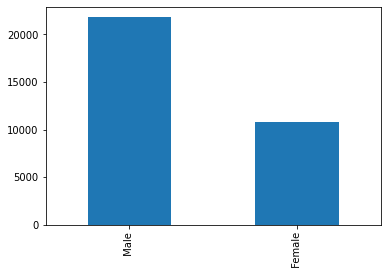

In [ ]:
df['sex'].value_counts().plot(kind='bar')

In [ ]:
df.shape

(32560, 17)

In [ ]:
df.columns

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'income', 'income_bi'],
      dtype='object')

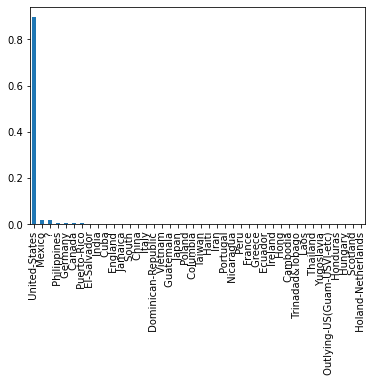

In [ ]:
df['native-country'].value_counts(normalize=True).plot(kind='bar')

In [ ]:
df = df.drop(['Unnamed: 0','fnlwgt','capital-gain', 'capital-loss','native-country'],axis=1)

In [ ]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'hours-per-week', 'income',
       'income_bi'],
      dtype='object')

In [ ]:
df['marital-status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [ ]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,income,income_bi
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K,0
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K,0
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K,0
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K,0
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,<=50K,0


In [ ]:
df['workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [ ]:
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [ ]:
df['race'].head()

0     White
1     White
2     Black
3     Black
4     White
Name: race, dtype: object

In [ ]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'hours-per-week', 'income',
       'income_bi'],
      dtype='object')

# Variables dummies

In [ ]:
df_dummies = pd.get_dummies(df, columns=['workclass', 'education','marital-status', 'occupation', 'relationship', 'race', 'sex'])

In [ ]:
df_dummies.head()

,age,education-num,hours-per-week,income,income_bi,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,50,13,13,<=50K,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,38,9,40,<=50K,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,53,7,40,<=50K,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,28,13,40,<=50K,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
4,37,14,40,<=50K,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0


In [ ]:
df_dummies.columns

Index(['age', 'education-num', 'hours-per-week', 'income', 'income_bi',
       'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'marital-status_ Divorced',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupat

In [ ]:
df_dummies = df_dummies.drop(['income'], axis=1)

# Entrenamiento

**Train, test split**

In [ ]:
Y = df_dummies['income_bi'] #Nuestra variable target u objetivo

In [ ]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: income_bi, Length: 32560, dtype: int64

In [ ]:
X = df_dummies.drop(['income_bi'],axis=1) #Variables predictoras

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state=99)

In [ ]:
X.shape

(32560, 63)

In [ ]:
x_train.shape

(26048, 63)

In [ ]:
32560*0.8

26048.0

In [ ]:
x_test.shape

(6512, 63)

In [ ]:
32560*0.2

6512.0

**Entrenamiento del modelo**

In [ ]:
t = tree.DecisionTreeClassifier(max_depth=3)

In [ ]:
model = t.fit(x_train, y_train)

In [ ]:
model.score(x_train, y_train) #modelo con 3 ramas

0.8215601965601965

In [ ]:
model.score(x_test, y_test) #modelo con 3 ramas

0.8158783783783784

Probemos con un modelo de 5 ramas

In [ ]:
t = tree.DecisionTreeClassifier(max_depth=5)

In [ ]:
model = t.fit(x_train, y_train)

In [ ]:
model.score(x_train, y_train) #modelo con 5 ramas

0.8265893734643734

In [ ]:
model.score(x_test, y_test) #modelo con 5 ramas

0.8186425061425061

Probemos con un modelo de 30 ramas

In [ ]:
t = tree.DecisionTreeClassifier(max_depth=30)

In [ ]:
model = t.fit(x_train, y_train)

In [ ]:
model.score(x_train, y_train) #modelo con 30 ramas

0.9646805896805897

In [ ]:
model.score(x_test, y_test) #modelo con 30 ramas (muy específico, problema: sobreentrenamiento)

0.7828624078624079

In [ ]:
  for numero in (range(1,30)):
    t = tree.DecisionTreeClassifier(max_depth=numero)
    model = t.fit(x_train, y_train)
    print('Con'+ str(numero)+ ' ramas')
    print(model.score(x_train, y_train))
    print(model.score(x_test, y_test))

Con1 ramas
0.7598664004914005
0.7564496314496314
Con2 ramas
0.8199861793611793
0.8167997542997543
Con3 ramas
0.8215601965601965
0.8158783783783784
Con4 ramas
0.8240555896805897
0.8195638820638821
Con5 ramas
0.8265893734643734
0.8186425061425061
Con6 ramas
0.8349969287469288
0.8269348894348895
Con7 ramas
0.8387976044226044
0.8246314496314496
Con8 ramas
0.843289312039312
0.8241707616707616
Con9 ramas
0.8491630835380836
0.8250921375921376
Con10 ramas
0.8558814496314496
0.8214066339066339
Con11 ramas
0.8636747542997543
0.8192567567567568
Con12 ramas
0.8715448402948403
0.8172604422604423
Con13 ramas
0.8802979115479116
0.8135749385749386
Con14 ramas
0.8883215601965602
0.8128071253071253
Con15 ramas
0.8964219901719902
0.8091216216216216
Con16 ramas
0.9046759828009828
0.8088144963144963
Con17 ramas
0.9122389434889435
0.8008292383292384
Con18 ramas
0.9196483415233415
0.8000614250614251
Con19 ramas
0.9263667076167076
0.7983722358722358
Con20 ramas
0.932585995085995
0.7972972972972973
Con21 ramas

Nos quedaremos con el modelo de 7 ramas

In [ ]:
t = tree.DecisionTreeClassifier(max_depth=3)
model = t.fit(x_train, y_train)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.8215601965601965
0.8158783783783784


# Gráfica del árbol de decisión

In [ ]:
dimensiones = (25,25)

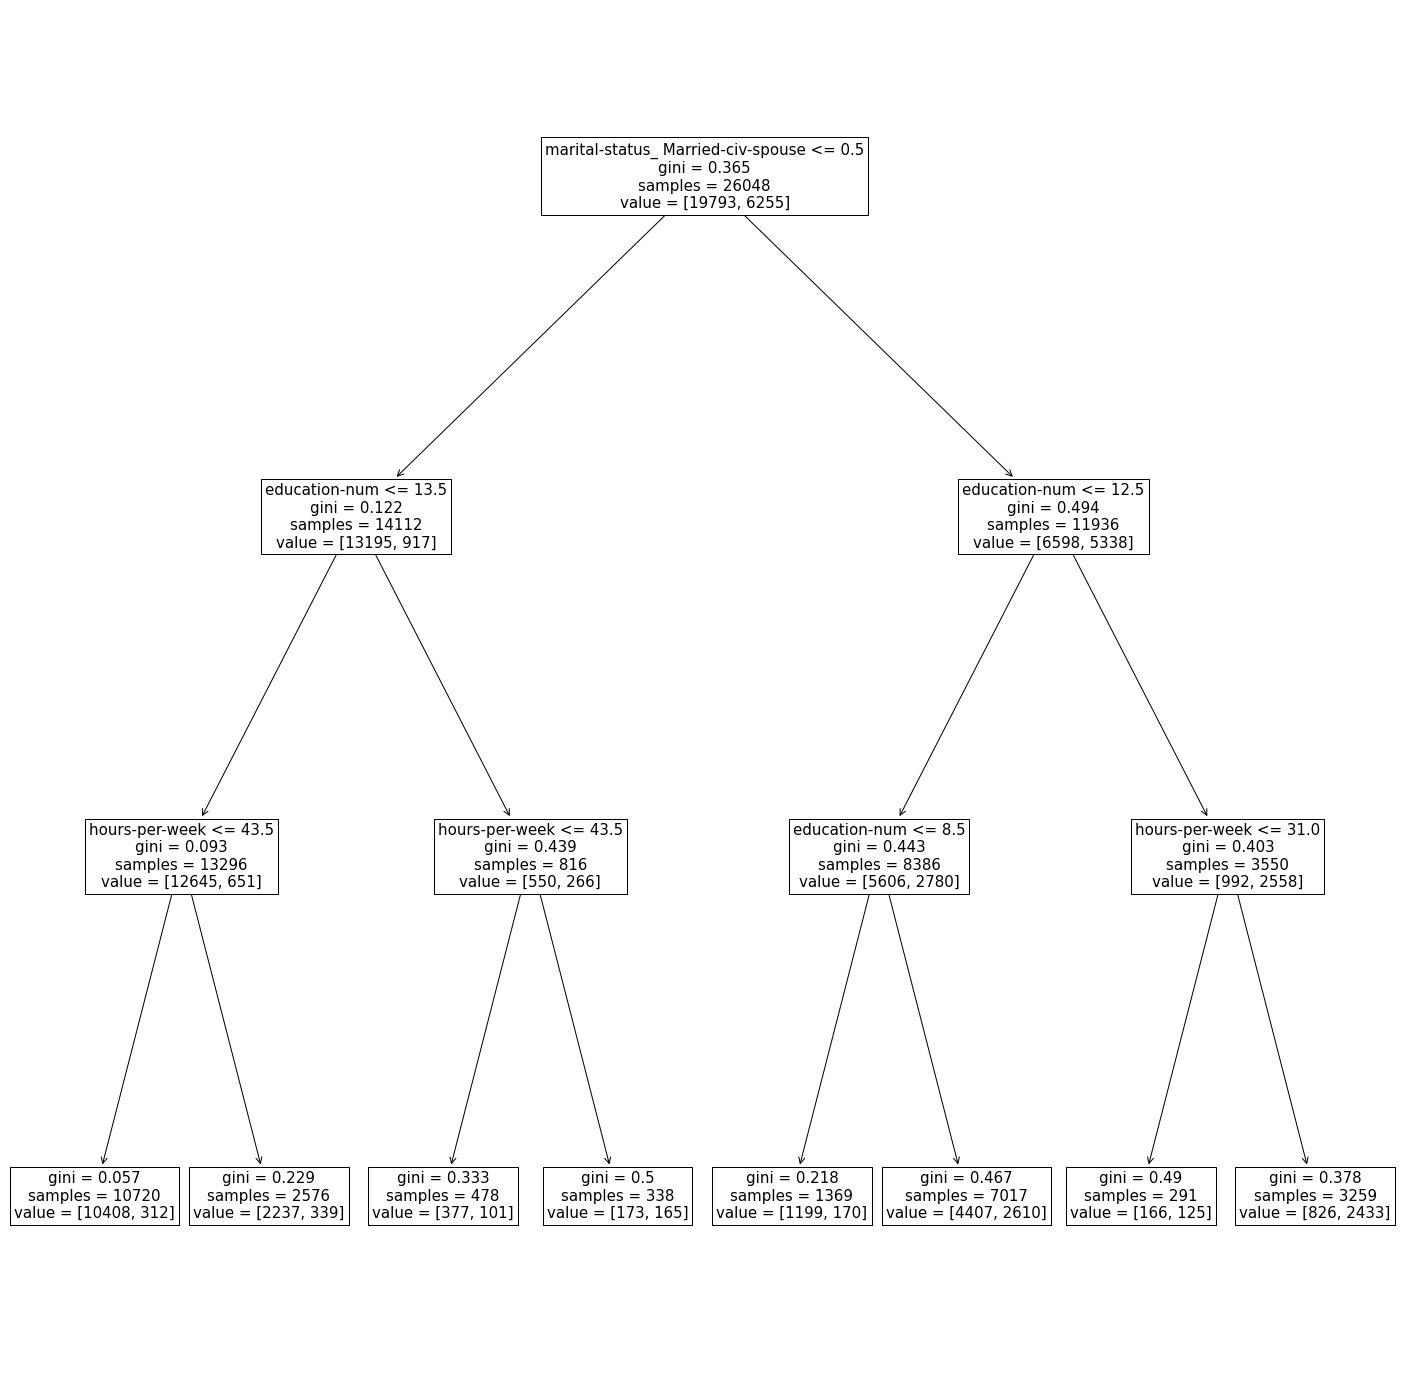

In [ ]:
fig, ax = plt.subplots(figsize=dimensiones)
tree.plot_tree(t, feature_names=X.columns, fontsize=15)
plt.show()

# Métricas de evaluación

In [ ]:
from sklearn.metrics  import confusion_matrix, classification_report

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

31849    0
3537     1
9258     0
20399    0
13644    1
        ..
1756     0
21440    0
1907     0
17378    0
26910    0
Name: income_bi, Length: 6512, dtype: int64

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      5661
           1       0.39      0.73      0.51       851

    accuracy                           0.82      6512
   macro avg       0.67      0.78      0.70      6512
weighted avg       0.88      0.82      0.84      6512

